Troy Morgan  
Week 10 Instructor-Led Lab  
BGEN 632, Graduate Introduction to Python  
Submitted April    

Instructor-led Lab: Data Reduction

# Setup

In [2]:
# Import modules

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [3]:
# set working directory and confirm change
os.chdir("\\Users\\troy.morgan\\Documents\\GitHub\\week10labs/data")  # change this to your filepath
os.getcwd()  

'C:\\Users\\troy.morgan\\Documents\\GitHub\\week10labs\\data'

In [5]:
# Load data and inspect
Cali_Hospital_df = pd.read_table('calihospital.txt')
Cali_Hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

# Principal Component Analysis (PCA) in Python

In [13]:
# Create new df of numerical columns and inspect
Cali_Hospital_numerical_df = (Cali_Hospital_df
 .filter(["NoFTE", "NetPatRev", "InOperExp", "OutOperExp", "OperRev", "OperInc", "AvlBeds"])
)
Cali_Hospital_numerical_df.head()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,327.0,135520.2186,20523425.53,34916220.47,49933713,-5505933,15
1,345.0,136156.6913,33447542.78,20348596.22,53351748,-444391,99
2,601.2,197094.2541,37254178.67,37832448.33,72933707,-2152920,107
3,400.0,139170.3798,23385570.10,24661355.90,51087341,3040415,55
4,262.0,116797.8306,13684502.49,15159986.51,42845642,14001153,42


In [14]:
# Conduct PCA
Cali_Hospital_pca_result = pca(n_components=7).fit(Cali_Hospital_numerical_df)

In [9]:
# Obtain eigenvalues
Cali_Hospital_pca_result.explained_variance_

array([2.75753261e+17, 6.75028311e+15, 2.04591348e+15, 2.44102791e+09,
       3.37008097e+05, 6.33647054e+03, 4.13822759e-05])

## Based on the eigenvalues, explain how many variables you should keep. Justify your reasoning.

Per the eigenvalues, 6 variables should be kept. This is becuase the eigenvalues are all greater than 1. 

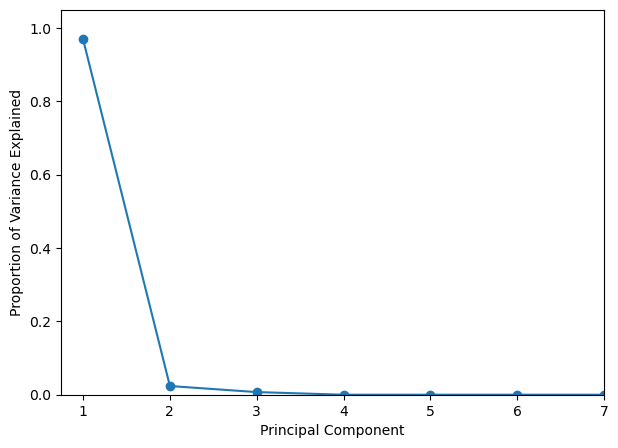

In [8]:
# Create and display a scree plot for the same set of data.

# generate scree plot - focus on the output
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], Cali_Hospital_pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()

## Based on the scree plot, how many variables should you keep? Why?

According to this scree plot, only one variable should be kept. This is becuase the curve seems to flatten with component 2. However, I have a sneaking suspicion that 2 should also be included. Should this data have been scaled? The NoFTA and AvlBeds definitely seem to be on a different scale. So, why not try this again, only following your instructions for scaling. 

In [19]:
# scale data using standardization
scaler = preprocessing.StandardScaler()
Cali_Hospital_scaled_df = scaler.fit_transform(Cali_Hospital_numerical_df)

# run PCA with scaled data
CH_scaled_pca_result = pca(n_components=7).fit(Cali_Hospital_scaled_df)

In [21]:
# Obtain eigenvalues from the scaled data
CH_scaled_pca_result.explained_variance_

array([5.72134563e+00, 1.07657967e+00, 1.91383827e-01, 9.31699632e-02,
       3.29143500e-02, 1.27322677e-03, 5.91421134e-22])

## Based on the eigenvalues of the scaled data, explain how many variables you should keep. Justify your reasoning.

Done like this, two variables should be kept as only two have eigenvalues greater than 1. 

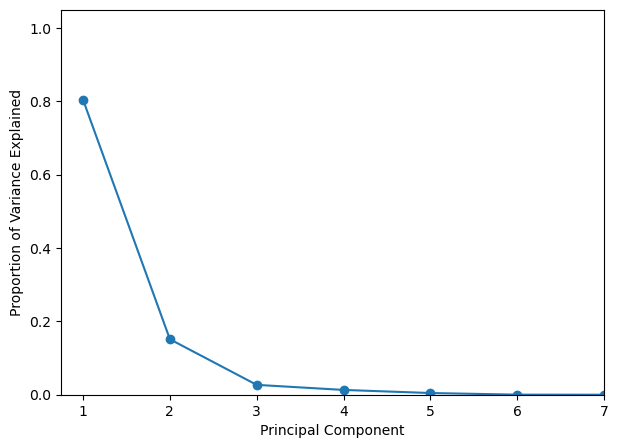

In [20]:
# generate scree plot of the scaled data 
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], CH_scaled_pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7])

plt.show()

## Based on the scree plot of the scaled data, how many variables should you keep? Why?

Well, that looks a bit different. Using the scaled data it looks like we should keep two variables and this curve flattens out starting with component 3.  

I hope I did this correctly. Either way: neat!

## Clustering in Python

Open the data within Python and conduct a k-means cluster analysis for the numerical data. Please conduct the following assessments:

* Choose a value of k and run your analysis. Justify your choice of k.
* Create a confusion matrix for each of the three categorical variables (e.g., `Teaching`, `TypeControl`, `DonorType`) and determine which of the three variables is the best grouping variable. Why do you think it is the best fitting?